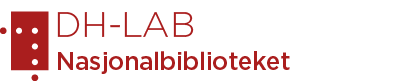

# Undersøk korpus med metadata


En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 



In [1]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
import dhlab.token_map as tm
import dhlab.graph_networkx_louvain as gnl

In [2]:
mu.css()

## Bygg korpus

Korpuset defineres med metadata som dewey, emneord, navn , år, etc. Her kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for ulike måter å definere korpus.

In [3]:
# ddk 335 er sosialisme

bøker = nb.book_corpus(
    period=(1950, 2010),
    #title='%',
    #subject='krig',
    ddk='335%', limit=300)

In [4]:
bøker

,urn,author,title,year
0,2014082508255,,Grunnsirkel i marxismen - leninismen,1974
1,2014090808102,,Om å lese Kapitalen,1983
2,2007100100073,"Marx, Karl","Karl Marx, Friedrich Engels",1991
3,2014031406074,"Elster, Jon",Hva er igjen av Marx?,1988
4,2007110501012,"Marx, Karl",Skrifter om den materialistiske historieoppfat...,1991
...,...,...,...,...
174,2007062900068,"Lamennais, Felicité Robert de",troendes tale,1978
175,2016060808149,"Lenin, V.I.",To slags taktikk for sosialdemokratiet i den d...,1982
176,2007061801037,"Glucksmann, André",Kokkepiken og menneskeeteren,1978
177,2012062805029,"Hellesøy, Anton",Loven om profittratens fallende tendens,1978


## Undersøk forskjeller

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [5]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = nb.get_corpus_text(nb.pure_urn(bøker)[:5])

In [6]:
bøker_dtm

,2014082508255,2014090808102,2007100100073,2014031406074,2007110501012
.,368.0,1864.0,3631.0,3404.0,2995.0
",",212.0,1477.0,5246.0,3065.0,4407.0
i,187.0,880.0,1889.0,1585.0,2268.0
og,181.0,949.0,2718.0,1560.0,2391.0
»,171.0,209.0,349.0,286.0,NaN
...,...,...,...,...,...
"(colonus),",NaN,NaN,NaN,NaN,1.0
(Slaveri,NaN,NaN,NaN,NaN,1.0
(Proudhon,NaN,NaN,NaN,NaN,1.0
"(Kapitalen,",NaN,NaN,NaN,NaN,1.0


Et varmekart gjør det enklere å få øye på likhet og variasjon i tallene.

In [7]:
nb.heatmap(bøker_dtm.head(50), color='#045599')

,2014082508255,2014090808102,2007100100073,2014031406074,2007110501012
.,368,1864,3631,3404,2995
",",212,1477,5246,3065,4407
i,187,880,1889,1585,2268
og,181,949,2718,1560,2391
»,171,209,349,286,0
er,132,854,2272,1572,1631
av,127,800,1694,1510,1793
å,121,440,1031,1261,0
som,110,852,2695,1350,2449
at,103,437,935,1149,842


Tre hundre bøker tar en tid å laste ned og telle opp lokalt så vi teller på server med passende kommando:

In [8]:
bøker_agg = nb.aggregate_urns(nb.pure_urn(bøker))

Så konverteres listen over ord og tall til en dataramme

In [9]:
bøker_df = nb.frame_sort(nb.frame(bøker_agg, 'count'))

For referanse henter vi ut de 50000 mest frekvente ordene i bokhylla.

In [10]:
totals = nb.frame(nb.totals(50000), 'tot')

Sånn ser frekvensene ut for bøkene

In [11]:
bøker_df.head(20)

,count
",",485488
.,431913
og,299126
i,277009
som,197925
av,189300
den,179799
det,177978
er,168222
til,152398


.. og sånn for bokhylla

In [12]:
totals.head(20)

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


Vi finner forskjellen ved å dividere den ene på den andre:

In [13]:
forskjell = bøker_df['count']/totals['tot']

Tallene må sorteres, de høyeste tolkes til å være de mest relevante

In [14]:
bøker_typiske_ord = nb.frame_sort(nb.frame(forskjell, 'ratio'))
bøker_typiske_ord.head(50)

,ratio
proletariatets,0.149739
proletariatet,0.145173
Engels,0.099062
kapitalens,0.098061
kapitalistiske,0.083680
Marx,0.076045
sosialismen,0.074794
kapitalismen,0.074625
marxismen,0.067131
borgerskapet,0.064280


Som ordsky

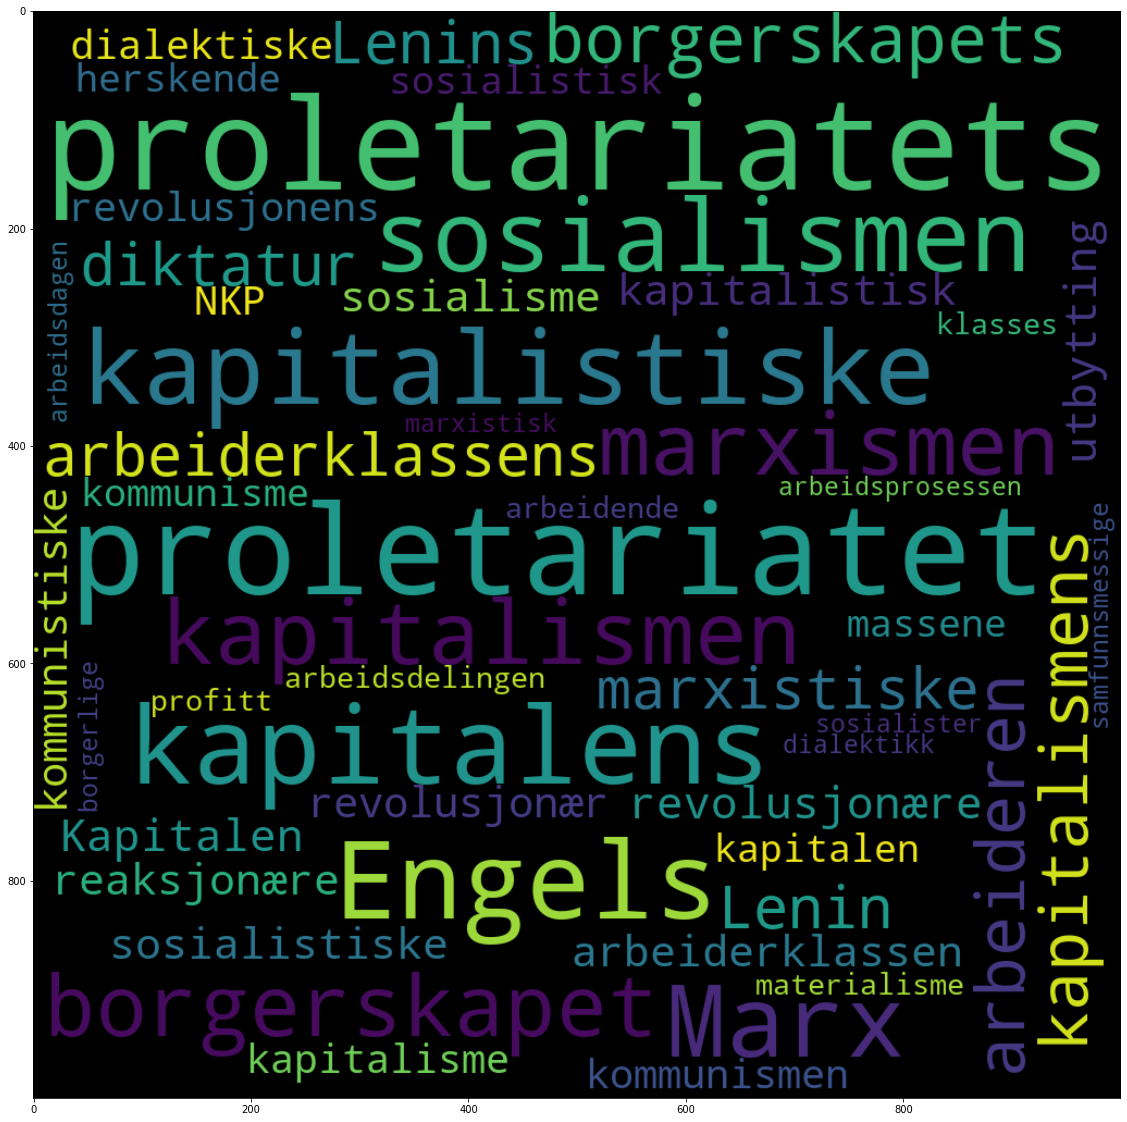

In [15]:
nb.cloud(bøker_typiske_ord.head(50))

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)